In [1]:
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

    x axis: sol (1st)
    y axis: water concentration (both)

    x axis: sol
    y axis: substraction of water concentrations / ave of water concentrations

    x axis: sol
    y axis: relative humidity

    x axis: sol
    y axis: air temp

In [2]:
data = pd.read_excel(r'data/wv_data.xlsx')

In [3]:
data

,time,surface bright temperature,Unnamed: 2,air temperature,Unnamed: 4,water concentration derived from relative humidity and air temperature,Unnamed: 6,water concentration derived from atmospheric pressure and water vapor mixing ratio,Unnamed: 8,relative humidity,Unnamed: 10,air pressure,Unnamed: 12,horizontal wind speed,Unnamed: 14
0,1.541667,232.130976,2.912383,266.900030,4.193424,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,704.004543,0.433318,NaN,NaN
1,9.500000,277.312929,1.435172,251.787912,0.587925,1.748621e-06,2.129926e-07,1.746734e-06,2.092683e-07,0.169663,0.028258,714.098485,0.291986,NaN,NaN
2,9.541667,276.328027,1.346681,257.280870,2.245031,9.116341e-08,1.726270e-07,9.138015e-08,1.707914e-07,0.006890,0.013189,708.384348,0.269517,NaN,NaN
3,9.583333,268.414254,3.523061,253.037360,1.054166,3.259404e-07,2.739322e-07,3.258327e-07,2.718778e-07,0.024674,0.021228,696.916371,2.708844,NaN,NaN
4,9.625000,263.484449,2.025895,252.040357,0.371776,4.509850e-07,1.971401e-07,4.501927e-07,1.930137e-07,0.033694,0.015075,693.529007,0.564038,NaN,NaN
5,9.666667,252.427508,2.246539,246.582997,0.466624,2.923600e-06,9.862596e-08,2.921980e-06,9.790862e-08,0.402929,0.014743,690.953367,0.143015,NaN,NaN
6,9.708333,235.767983,2.961548,232.204370,0.103084,3.135539e-06,3.241200e-08,3.134900e-06,3.190092e-08,1.449916,0.016828,693.442353,0.079301,NaN,NaN
7,9.750000,223.332521,3.605738,230.642941,1.861674,2.154486e-06,1.720283e-08,2.153204e-06,1.727873e-08,2.706050,0.027446,707.043866,0.232770,NaN,NaN
8,9.791667,214.387353,4.379853,222.825504,0.865559,1.558020e-06,9.493363e-09,1.556675e-06,9.388572e-09,3.996134,0.078243,733.984538,0.372141,NaN,NaN
9,9.833333,209.881429,5.008461,216.946345,0.214968,1.165286e-06,8.757586e-09,1.164179e-06,8.831149e-09,4.977143,0.054920,740.479160,0.192035,NaN,NaN


In [4]:
x_time = [row[0] for (index, row) in data.iterrows()]

In [5]:
water_conc_relative_hum_air_temp = [row[5] for (index, row) in data.iterrows()]

air_temp = [row[3] for (index, row) in data.iterrows()]

relative_hum = [row[9] for (index, row) in data.iterrows()]

water_conc_atm_pres_vapor_mix_ratio = [row[7] for (index, row) in data.iterrows()]

In [6]:
air_pressure = [row[11] for (index, row) in data.iterrows()]

In [129]:
horizontal_wind_speed = [row[13] for (index, row) in data.iterrows()]

In [164]:
division_2 = [2 for e in range(len(water_conc_relative_hum_air_temp))]
ave_bet_conc = np.divide(np.add(water_conc_relative_hum_air_temp, water_conc_atm_pres_vapor_mix_ratio), division_2)
subtract_conc = np.subtract(water_conc_atm_pres_vapor_mix_ratio, water_conc_relative_hum_air_temp)
final_sub_conc = np.divide(subtract_conc, ave_bet_conc)

In [174]:
pos_conc = [abs(e) for e in final_sub_conc]

In [180]:
# draw a prob dist among the difference bet 2 concentration
divs = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for p in pos_conc:
    if 0 < p < 0.01:
        divs[0] += 1
    if 0.01 < p < 0.02:
        divs[1] += 1
    if 0.02 < p < 0.03:
        divs[2] += 1
    if 0.03 < p < 0.04:
        divs[3] += 1
    if 0.04 < p < 0.05:
        divs[4] += 1
    if 0.05 < p < 0.06:
        divs[5] += 1
    if 0.06 < p < 0.07:
        divs[6] += 1
    if 0.07 < p < 0.08:
        divs[7] += 1
    if 0.08 < p < 0.09:
        divs[8] += 1
    if 0.09 < p < 0.10:
        divs[9] += 1
divs

[54315, 226, 165, 109, 105, 57, 42, 23, 7, 9, 0]

In [190]:
res = 54315 / len(x_time)
res

0.9864513902762391

Text(0.5, 0, 'P dist')

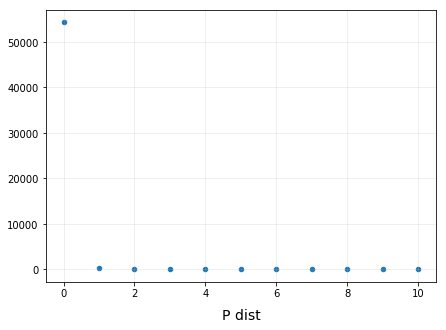

In [188]:
fig, axs = plt.subplots(1, 1, figsize= (7,5))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

axs.scatter(range(len(divs)), divs, s = 20)
#axs.set_xticks(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)

#axs.set_ylim(0, 0.1)

axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

plt.xlabel('P dist', labelpad = 10, fontsize = 14)
#plt.ylabel('Normalized difference', labelpad = 12, fontsize = 14)

Text(0, 0.5, 'Relative difference')

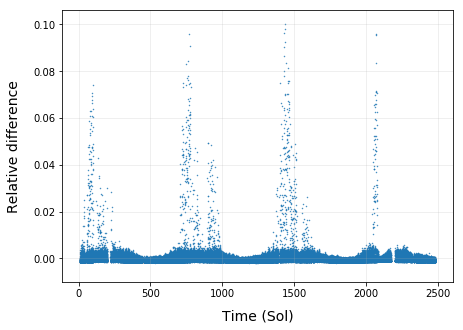

In [191]:
fig, axs = plt.subplots(1, 1, figsize= (7,5))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

axs.scatter(x_time, final_sub_conc, s = 0.2)
#axs.set_xlim(300, 305)
axs.set_ylim(-0.01, 0.106)

axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

plt.xlabel('Time (Sol)', labelpad = 10, fontsize = 14)
plt.ylabel('Relative difference', labelpad = 12, fontsize = 14)

Text(0, 0.5, 'Relative Humidity')

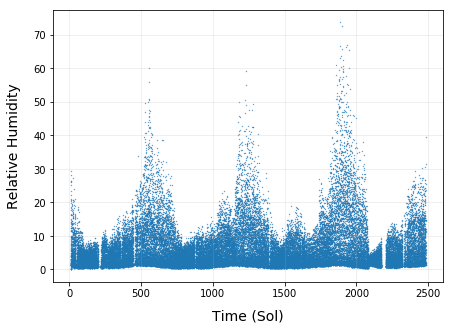

In [128]:
fig, axs = plt.subplots(1, 1, figsize= (7,5))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

axs.scatter(x_time, relative_hum, s = 0.1)
#axs.set_xlim(300, 305)
#axs.set_ylim(0, 12)

axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

plt.xlabel('Time (Sol)', labelpad = 10, fontsize = 14)
plt.ylabel('Relative Humidity', labelpad = 12, fontsize = 14)

Text(0, 0.5, 'Relative Humidity')

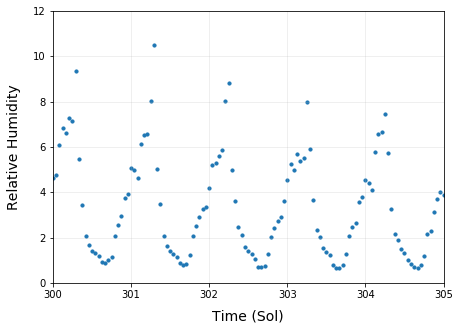

In [155]:
fig, axs = plt.subplots(1, 1, figsize= (7,5))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

axs.scatter(x_time, relative_hum, s = 10)
axs.set_xlim(300, 305)
axs.set_ylim(0, 12)

axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

plt.xlabel('Time (Sol)', labelpad = 10, fontsize = 14)
plt.ylabel('Relative Humidity', labelpad = 12, fontsize = 14)

Text(0.5, 1.0, 'Water concentration derived from relative humidity and air temperature')

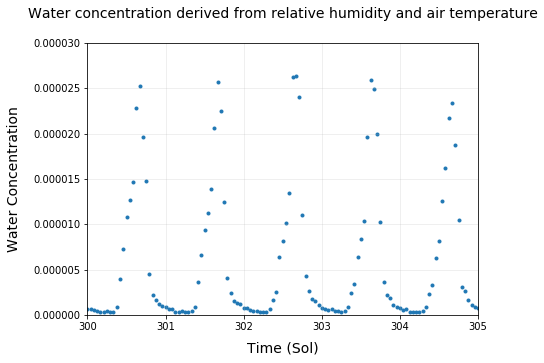

In [108]:
fig, axs = plt.subplots(1, 1, figsize= (7,5))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

axs.scatter(x_time, water_conc_relative_hum_air_temp, s = 9)
axs.set_xlim(300, 305)

axs.set_ylim(0, 0.00003)
#axs.set_yticks([0, 0.000005, 0.00001, 0.000015, 0.00002, 0.000025, 0.00003])
#axs.set_yticklabels(['0', '5.0 x $10^{-5}$', '1.0 x $10^{-4}$', '1.5 x $10^{-4}$', '2.0 x $10^{-4}$', '2.5 x $10^{-4}$', 
 #                       '3.0 x $10^{-4}$'], fontsize = 11)
axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

plt.xlabel('Time (Sol)', labelpad = 10, fontsize = 14)
plt.ylabel('Water Concentration', labelpad = 12, fontsize = 14)
plt.title('Water concentration derived from relative humidity and air temperature', pad = 25, fontsize = 14)

Text(0.5, 1.0, 'Water concentration derived from relative humidity and air temperature')

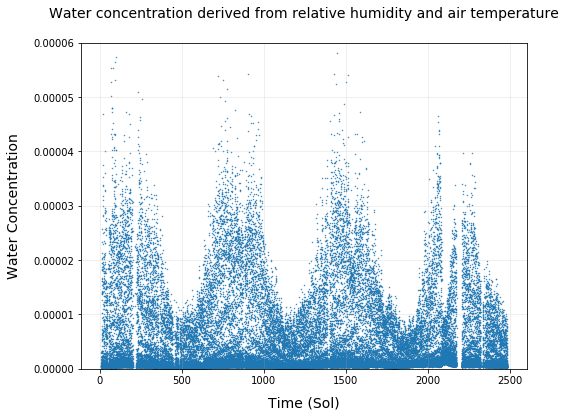

In [110]:
fig, axs = plt.subplots(1, 1, figsize= (8,6))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

axs.scatter(x_time, water_conc_relative_hum_air_temp, s = 0.2)
#axs.set_xlim(300, 305)

axs.set_ylim(0, 0.00006)
#axs.set_yticks([0, 0.000005, 0.00001, 0.000015, 0.00002, 0.000025, 0.00003, 0.000035, 0.0000])
#axs.set_yticklabels(['0', '5.0 x $10^{-5}$', '1.0 x $10^{-4}$', '1.5 x $10^{-4}$', '2.0 x $10^{-4}$', '2.5 x $10^{-4}$', 
#                        '3.0 x $10^{-4}$'], fontsize = 11)
axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

plt.xlabel('Time (Sol)', labelpad = 10, fontsize = 14)
plt.ylabel('Water Concentration', labelpad = 12, fontsize = 14)
plt.title('Water concentration derived from relative humidity and air temperature', pad = 25, fontsize = 14)

Text(0.5, 1.0, 'Water concentration derived from atmospheric pressure and water vapor mixing ratio')

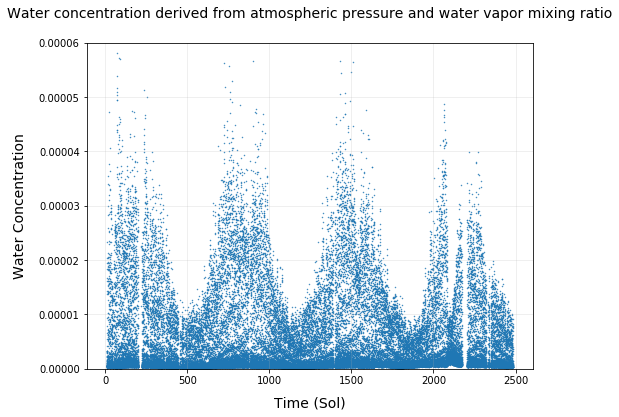

In [109]:
fig, axs = plt.subplots(1, 1, figsize= (8,6))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

axs.scatter(x_time, water_conc_atm_pres_vapor_mix_ratio, s = 0.2)
#axs.set_xlim(300, 305)

axs.set_ylim(0, 0.00006)
#axs.set_yticks([0, 0.000005, 0.00001, 0.000015, 0.00002, 0.000025, 0.00003, 0.000035, 0.0000])
#axs.set_yticklabels(['0', '5.0 x $10^{-5}$', '1.0 x $10^{-4}$', '1.5 x $10^{-4}$', '2.0 x $10^{-4}$', '2.5 x $10^{-4}$', 
#                        '3.0 x $10^{-4}$'], fontsize = 11)
axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

plt.xlabel('Time (Sol)', labelpad = 10, fontsize = 14)
plt.ylabel('Water Concentration', labelpad = 12, fontsize = 14)
plt.title('Water concentration derived from atmospheric pressure and water vapor mixing ratio', pad = 25, fontsize = 14)

Text(0.5, 1.0, 'Water concentration derived from atmospheric pressure and water vapor mixing ratio')

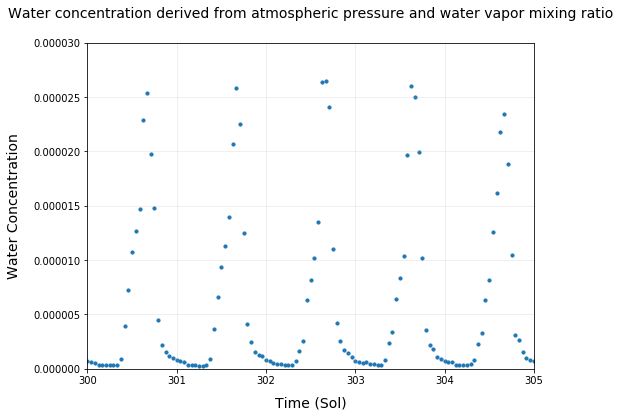

In [112]:
fig, axs = plt.subplots(1, 1, figsize= (8,6))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

axs.scatter(x_time, water_conc_atm_pres_vapor_mix_ratio, s = 10)
axs.set_xlim(300, 305)

axs.set_ylim(0, 0.00003)
#axs.set_yticks([0, 0.000005, 0.00001, 0.000015, 0.00002, 0.000025, 0.00003, 0.000035, 0.0000])
#axs.set_yticklabels(['0', '5.0 x $10^{-5}$', '1.0 x $10^{-4}$', '1.5 x $10^{-4}$', '2.0 x $10^{-4}$', '2.5 x $10^{-4}$', 
#                        '3.0 x $10^{-4}$'], fontsize = 11)
axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

plt.xlabel('Time (Sol)', labelpad = 10, fontsize = 14)
plt.ylabel('Water Concentration', labelpad = 12, fontsize = 14)
plt.title('Water concentration derived from atmospheric pressure and water vapor mixing ratio', pad = 25, fontsize = 14)

Text(0, 0.5, 'Air pressure (Pa)')

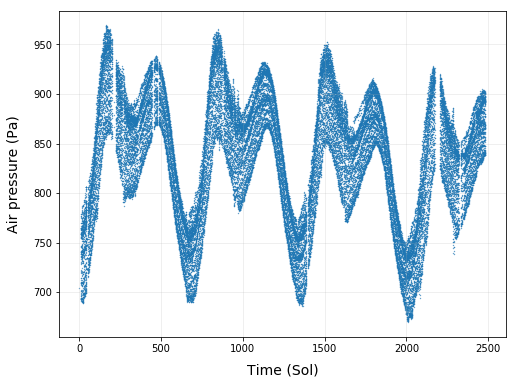

In [149]:
fig, axs = plt.subplots(1, 1, figsize= (8,6))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

axs.scatter(x_time, air_pressure, s = 0.1)
#axs.set_xlim(300, 305)

#axs.set_ylim(0, 0.00003)
#axs.set_yticks([0, 0.000005, 0.00001, 0.000015, 0.00002, 0.000025, 0.00003, 0.000035, 0.0000])
#axs.set_yticklabels(['0', '5.0 x $10^{-5}$', '1.0 x $10^{-4}$', '1.5 x $10^{-4}$', '2.0 x $10^{-4}$', '2.5 x $10^{-4}$', 
#                        '3.0 x $10^{-4}$'], fontsize = 11)
axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

plt.xlabel('Time (Sol)', labelpad = 10, fontsize = 14)
plt.ylabel('Air pressure (Pa)', labelpad = 12, fontsize = 14)

Text(0, 0.5, 'Air pressure (Pa)')

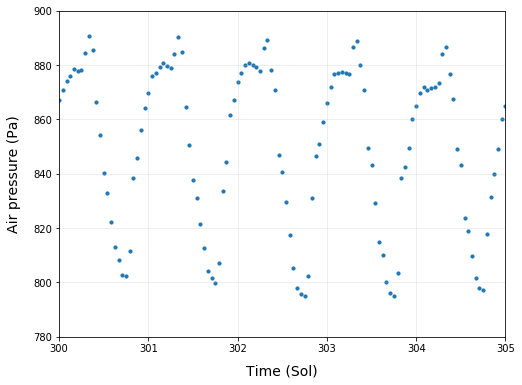

In [154]:
fig, axs = plt.subplots(1, 1, figsize= (8,6))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

axs.scatter(x_time, air_pressure, s = 10)
axs.set_xlim(300, 305)

axs.set_ylim(780, 900)
#axs.set_yticks([0, 0.000005, 0.00001, 0.000015, 0.00002, 0.000025, 0.00003, 0.000035, 0.0000])
#axs.set_yticklabels(['0', '5.0 x $10^{-5}$', '1.0 x $10^{-4}$', '1.5 x $10^{-4}$', '2.0 x $10^{-4}$', '2.5 x $10^{-4}$', 
#                        '3.0 x $10^{-4}$'], fontsize = 11)
axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

plt.xlabel('Time (Sol)', labelpad = 10, fontsize = 14)
plt.ylabel('Air pressure (Pa)', labelpad = 12, fontsize = 14)

Text(0, 0.5, 'Horizontal wind speed')

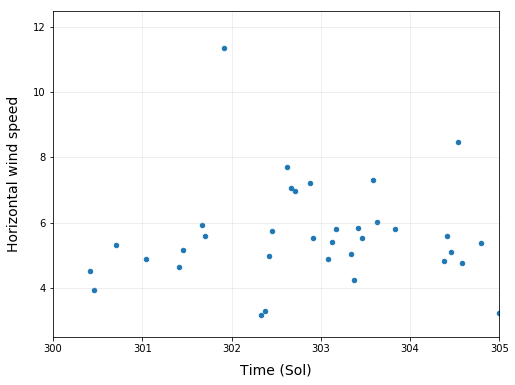

In [140]:
fig, axs = plt.subplots(1, 1, figsize= (8,6))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

axs.scatter(x_time, horizontal_wind_speed, s = 20)
axs.set_xlim(300, 305)

axs.set_ylim(2.5, 12.5)
#axs.set_yticks([0, 0.000005, 0.00001, 0.000015, 0.00002, 0.000025, 0.00003, 0.000035, 0.0000])
#axs.set_yticklabels(['0', '5.0 x $10^{-5}$', '1.0 x $10^{-4}$', '1.5 x $10^{-4}$', '2.0 x $10^{-4}$', '2.5 x $10^{-4}$', 
#                        '3.0 x $10^{-4}$'], fontsize = 11)
axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

plt.xlabel('Time (Sol)', labelpad = 10, fontsize = 14)
plt.ylabel('Horizontal wind speed', labelpad = 12, fontsize = 14)

Text(0, 0.5, 'Horizontal wind speed')

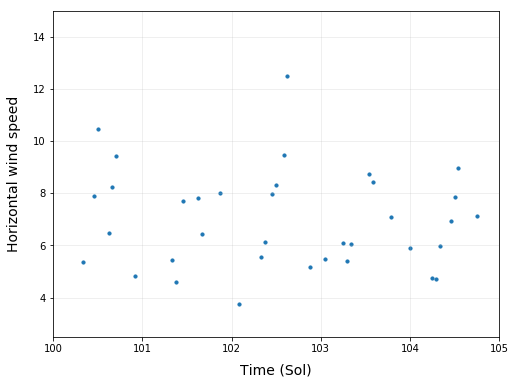

In [145]:
fig, axs = plt.subplots(1, 1, figsize= (8,6))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

axs.scatter(x_time, horizontal_wind_speed, s = 10)
axs.set_xlim(100, 105)

axs.set_ylim(2.5, 15)
#axs.set_yticks([0, 0.000005, 0.00001, 0.000015, 0.00002, 0.000025, 0.00003, 0.000035, 0.0000])
#axs.set_yticklabels(['0', '5.0 x $10^{-5}$', '1.0 x $10^{-4}$', '1.5 x $10^{-4}$', '2.0 x $10^{-4}$', '2.5 x $10^{-4}$', 
#                        '3.0 x $10^{-4}$'], fontsize = 11)
axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

plt.xlabel('Time (Sol)', labelpad = 10, fontsize = 14)
plt.ylabel('Horizontal wind speed', labelpad = 12, fontsize = 14)

    Sooo... right now I need to fill in the gap (｡ ́︿ ̀｡)
    YAY
    haha let's start looking at the time(sol) that was missing (step 1)

In [8]:
data

,time,surface bright temperature,Unnamed: 2,air temperature,Unnamed: 4,water concentration derived from relative humidity and air temperature,Unnamed: 6,water concentration derived from atmospheric pressure and water vapor mixing ratio,Unnamed: 8,relative humidity,Unnamed: 10,air pressure,Unnamed: 12,horizontal wind speed,Unnamed: 14
0,1.541667,232.130976,2.912383,266.900030,4.193424,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,704.004543,0.433318,NaN,NaN
1,9.500000,277.312929,1.435172,251.787912,0.587925,1.748621e-06,2.129926e-07,1.746734e-06,2.092683e-07,0.169663,0.028258,714.098485,0.291986,NaN,NaN
2,9.541667,276.328027,1.346681,257.280870,2.245031,9.116341e-08,1.726270e-07,9.138015e-08,1.707914e-07,0.006890,0.013189,708.384348,0.269517,NaN,NaN
3,9.583333,268.414254,3.523061,253.037360,1.054166,3.259404e-07,2.739322e-07,3.258327e-07,2.718778e-07,0.024674,0.021228,696.916371,2.708844,NaN,NaN
4,9.625000,263.484449,2.025895,252.040357,0.371776,4.509850e-07,1.971401e-07,4.501927e-07,1.930137e-07,0.033694,0.015075,693.529007,0.564038,NaN,NaN
5,9.666667,252.427508,2.246539,246.582997,0.466624,2.923600e-06,9.862596e-08,2.921980e-06,9.790862e-08,0.402929,0.014743,690.953367,0.143015,NaN,NaN
6,9.708333,235.767983,2.961548,232.204370,0.103084,3.135539e-06,3.241200e-08,3.134900e-06,3.190092e-08,1.449916,0.016828,693.442353,0.079301,NaN,NaN
7,9.750000,223.332521,3.605738,230.642941,1.861674,2.154486e-06,1.720283e-08,2.153204e-06,1.727873e-08,2.706050,0.027446,707.043866,0.232770,NaN,NaN
8,9.791667,214.387353,4.379853,222.825504,0.865559,1.558020e-06,9.493363e-09,1.556675e-06,9.388572e-09,3.996134,0.078243,733.984538,0.372141,NaN,NaN
9,9.833333,209.881429,5.008461,216.946345,0.214968,1.165286e-06,8.757586e-09,1.164179e-06,8.831149e-09,4.977143,0.054920,740.479160,0.192035,NaN,NaN


### I need to get all the missing hours:
1. round all number to two decimal place
2. range every 0.04 per day:
    - in everyday: create an array every 0.04
    - if y is within 0.04 array, put it inside
3. look for the closest daily average, if the array is not empty, fill in the array
4. test: 
    - access the empty day & time
    - plot them to see if it matches with the data trends

In [8]:
# can cut the float to the desired decimal places
def truncate_float(n, places):
    return int(n * (10 ** places)) / 10 ** places

In [10]:
x_within_time_frame = [x_time[i] for i in x_index_within_time_frame]

In [11]:
index_day_within_frame = [int(i) - 1 for i in x_within_time_frame] # this returns a repeated index

In [12]:
# access the index of the days that at least contains the data in that time frame
from collections import OrderedDict
index_day_within_time_frame = list(OrderedDict.fromkeys(index_day_within_frame))

In [15]:
int_time = [int(e) for e in x_time]
x_y_wv_conc1_zip = zip(int_time, water_conc_relative_hum_air_temp)
max_day = int(x_time[-1])
day_total = [e + 1 for e in range(max_day)]

### relative humidity daily seasonal monthly annual mean

In [375]:
# this is the ranged conc
ranged_relative_hum = [[e[1] for e in zip(int_time, relative_hum) if e[0] == day] for day in day_total]

# access the x and y that do not contain any missing values for the hours
hum_full_day_y = [ranged_relative_hum[i] for i in full_day_index]

# get the average of them
hum_ave_daily_full_day = [np.mean(e) for e in hum_full_day_y]

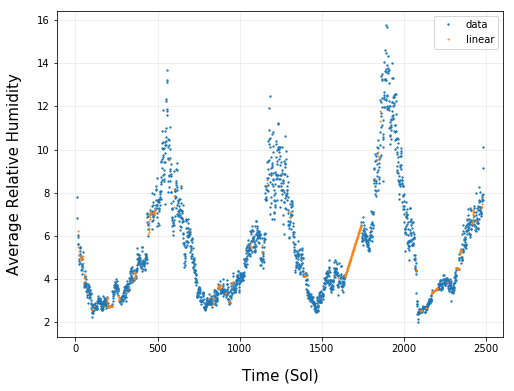

In [377]:
hum_ave_daily_full_day[1456] = float('nan')
hum_ave_daily_full_day[0]= float('nan')

hum_f = interp1d(full_day_x, hum_ave_daily_full_day)

fig, axs = plt.subplots(1, 1, figsize= (8,6))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)
plt.plot(full_day_x, hum_ave_daily_full_day, 'o', x_new, hum_f(x_new), '*', ms = 1.3)
axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

plt.xlabel('Time (Sol)', labelpad = 15, fontsize = 15)
plt.ylabel('Average Relative Humidity', labelpad = 15, fontsize = 15)
plt.legend(['data', 'linear'], loc='best')
plt.show()

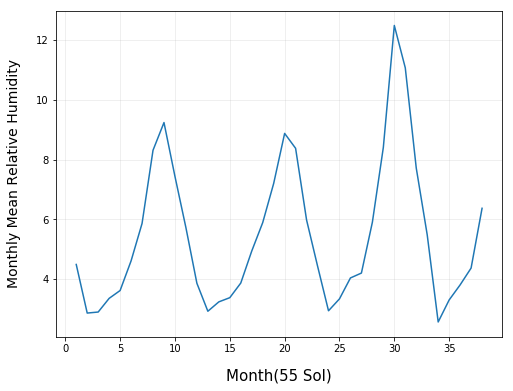

In [379]:
hum_ave_daily_full_day = [np.mean(e) for e in hum_full_day_y]
hum_f = interp1d(full_day_x, hum_ave_daily_full_day)
all_daily_hum = hum_f(full_day_x)


hum_monthly_total = [e for e in day_total if e%55 == 0]
hum_monthly_total.insert(0, 0)
tem_monthly_ranged_y = [[e[1] for e in zip(day_total, all_daily_hum) if month < e[0] <= month + 55
                    ] for month in hum_monthly_total]
hum_monthly_ranged_y = [e for e in tem_monthly_ranged_y if len(e) >= 55]
hum_monthly_x = [i + 1 for i in range(len(hum_monthly_ranged_y))]

hum_monthly_ave_conc = [np.mean(e) for e in hum_monthly_ranged_y]


fig, axs = plt.subplots(1, 1, figsize= (8,6))

fig.subplots_adjust(hspace=0)
axs.plot(hum_monthly_x, hum_monthly_ave_conc)
axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

plt.xlabel('Month(55 Sol)', labelpad = 15, fontsize = 15)
plt.ylabel('Monthly Mean Relative Humidity', labelpad = 15, fontsize = 14)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.show()

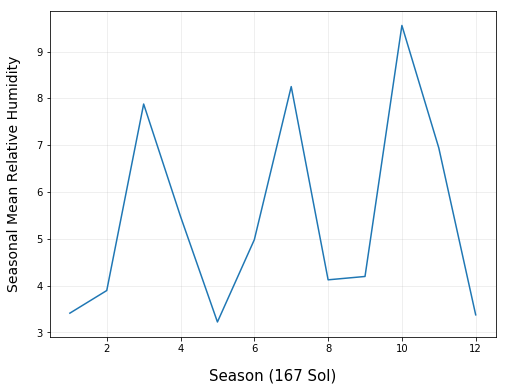

In [381]:
hum_ave_daily_full_day = [np.mean(e) for e in hum_full_day_y]
hum_f = interp1d(full_day_x, hum_ave_daily_full_day)
all_daily_hum = hum_f(full_day_x)

hum_seasonal_total = [e for e in day_total if e%167 == 0]

hum_seasonal_total.insert(0, 0)
hum_seasonal_ranged_y = [[e[1] for e in zip(day_total, all_daily_hum) if season < e[0] <= season + 167
                    ] for season in hum_seasonal_total]
hum_seasonal_ranged_y = [e for e in hum_seasonal_ranged_y if len(e) == 167]
hum_seasonal_x = [i + 1 for i in range(len(hum_seasonal_ranged_y))]

hum_seasonal_ave_conc = [np.mean(e) for e in hum_seasonal_ranged_y]

fig, axs = plt.subplots(1, 1, figsize= (8,6))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)
axs.plot(hum_seasonal_x, hum_seasonal_ave_conc)

#axs.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4])
#axs.set_yticklabels(['0','', '0.02', '', '0.04', '', '0.06', '', '0.08', '', '0.10', '', '0.12', '','0.14'], fontsize = 13)
axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

#axs.set_yscale('log')

plt.xlabel('Season (167 Sol)', labelpad = 15, fontsize = 15)
plt.ylabel('Seasonal Mean Relative Humidity', labelpad = 15, fontsize = 14)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.show()

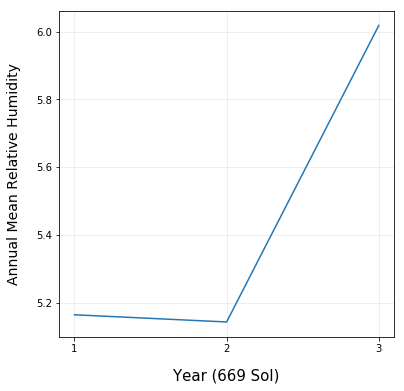

In [383]:
hum_annual_total = [e for e in day_total if e%669 == 0]
hum_annual_total.insert(0, 0)
hum_annual_ranged_y = [[e[1] for e in zip(day_total, all_daily_hum) if year < e[0] <= year + 669
                    ] for year in hum_annual_total]
hum_annual_ranged_y = [e for e in hum_annual_ranged_y if len(e) >= 669]
hum_annual_x = [i + 1 for i in range(len(hum_annual_ranged_y))]

hum_annual_ave_conc = [np.mean(e) for e in hum_annual_ranged_y]


fig, axs = plt.subplots(1, 1, figsize= (6,6))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)
axs.plot(hum_annual_x, hum_annual_ave_conc)
axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

plt.xlabel('Year (669 Sol)', labelpad = 15, fontsize = 15)
plt.ylabel('Annual Mean Relative Humidity', labelpad = 15, fontsize = 14)
axs.set_xticks([1,2,3])
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.show()

### monthly analysis
- take average of all the month in the 3 years
- substract the monthly mean by the average

In [490]:
# monthly average
hum_monthly_ave_conc = [np.mean(e) for e in hum_monthly_ranged_y]
monthly_hum = [e for e in hum_monthly_ave_conc if e >= 0]
month_x = [e + 1 for e in range(len(monthly_hum))]
months = [e for e in month_x if e%12 == 0]
months.insert(0, 0)
hum_ranged_by_month = [[e[1] for e in zip(month_x, monthly_hum) if month < e[0] <= month + 12
                    ] for month in months]
hum_ranged_with_month = [e for e in hum_ranged_by_month if len(e) == 12]
hum_month_ave = list(np.mean(hum_ranged_with_month, axis = 0))
hum_jan_ave = np.mean([hum_ranged_by_month[0][0], hum_ranged_by_month[1][0], hum_ranged_by_month[2][0],
                      hum_ranged_by_month[3][0]], axis = 0)
hum_feb_ave = np.mean([hum_ranged_by_month[0][1], hum_ranged_by_month[1][1], hum_ranged_by_month[2][1],
                      hum_ranged_by_month[3][1]], axis = 0)
hum_month_ave[0] = hum_jan_ave
hum_month_ave[1] = hum_feb_ave
hum_y_1 = hum_ranged_by_month[0]
hum_y_2 = hum_ranged_by_month[1]
hum_y_3 = hum_ranged_by_month[2]
hum_y_4 = hum_ranged_by_month[3]
hum_y_1_sub = np.subtract(hum_y_1, hum_month_ave)
hum_y_2_sub = np.subtract(hum_y_2, hum_month_ave)
hum_y_3_sub = np.subtract(hum_y_3, hum_month_ave)
hum_y_4_sub = np.subtract(hum_y_4, [hum_month_ave[0], hum_month_ave[1]])
hum_y = [hum_y_1_sub, hum_y_2_sub, hum_y_3_sub, hum_y_4_sub]

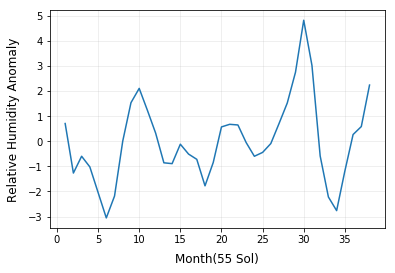

In [505]:
nn_hum_y = [0.70956415, -1.26454687, -0.5951914 , -1.02031664, -2.03775657,
        -3.05344836, -2.18303807,  0.01028604,  1.54075219,  2.11052767,
         1.23374033,  0.325015,
        -0.8562729 , -0.8898371 , -0.11446317, -0.50822187, -0.71788588,
        -1.77375909, -0.84387095,  0.5739904 ,  0.67820263,  0.65226064,
        -0.04797884, -0.59580796,
        -0.44193647, -0.0887482 ,  0.70965456,  1.52853851,  2.75564245,
         4.82720745,  3.02690902, -0.58427644, -2.21895481, -2.7627883 ,
        -1.18576149,  0.27079296,
        0.58864522, 2.24313216]

fig, axs = plt.subplots(1, 1)

fig.subplots_adjust(hspace=0)
axs.plot(month_x, nn_hum_y)

axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

#axs.set_yscale('log')

plt.xlabel('Month(55 Sol)', labelpad = 8, fontsize = 12)
plt.ylabel('Relative Humidity Anomaly', labelpad = 8, fontsize = 12)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.show()

In [508]:
# monthly average
n_monthly_ave_conc = [np.mean(e) for e in n_monthly_ranged_y]
monthly_wv = [e for e in n_monthly_ave_conc if e >= 0]
month_x = [e + 1 for e in range(len(monthly_wv))]
months = [e for e in month_x if e%12 == 0]
months.insert(0, 0)
wv_ranged_by_month = [[e[1] for e in zip(month_x, monthly_wv) if month < e[0] <= month + 12
                    ] for month in months]
wv_ranged_with_month = [e for e in wv_ranged_by_month if len(e) == 12]
wv_month_ave = list(np.mean(wv_ranged_with_month, axis = 0))
wv_jan_ave = np.mean([wv_ranged_by_month[0][0], wv_ranged_by_month[1][0], wv_ranged_by_month[2][0],
                      wv_ranged_by_month[3][0]], axis = 0)
wv_feb_ave = np.mean([wv_ranged_by_month[0][1], wv_ranged_by_month[1][1], wv_ranged_by_month[2][1],
                      wv_ranged_by_month[3][1]], axis = 0)
wv_month_ave[0] = wv_jan_ave
wv_month_ave[1] = wv_feb_ave
wv_y_1 = wv_ranged_by_month[0]
wv_y_2 = wv_ranged_by_month[1]
wv_y_3 = wv_ranged_by_month[2]
wv_y_4 = wv_ranged_by_month[3]
wv_y_1_sub = np.subtract(wv_y_1, wv_month_ave)
wv_y_2_sub = np.subtract(wv_y_2, wv_month_ave)
wv_y_3_sub = np.subtract(wv_y_3, wv_month_ave)
wv_y_4_sub = np.subtract(wv_y_4, [wv_month_ave[0], wv_month_ave[1]])
wv_y = [wv_y_1_sub, wv_y_2_sub, wv_y_3_sub, wv_y_4_sub]
wv_y

[array([-5.60617593e-07,  1.26053973e-06,  4.18314732e-07,  1.82800152e-06,
         1.91834554e-06,  1.18588979e-06,  7.69180865e-09, -1.10707743e-06,
        -2.02230285e-06, -3.94996381e-07, -6.09550382e-07,  3.78583548e-07]),
 array([ 1.30854144e-06,  1.15873650e-06,  6.63396057e-07,  6.24857031e-07,
        -1.00042383e-07, -3.00723299e-07, -4.85452678e-07, -6.74837349e-07,
        -1.31268384e-06,  2.41157252e-07,  4.86117756e-07,  9.74947265e-07]),
 array([ 1.37669203e-06,  4.67981154e-07, -1.08171079e-06, -2.45285856e-06,
        -1.81830316e-06, -8.85166490e-07,  4.77760869e-07,  1.78191478e-06,
         3.33498668e-06,  1.53839129e-07,  1.23432627e-07, -1.35353081e-06]),
 array([-2.12461587e-06, -2.88725739e-06])]

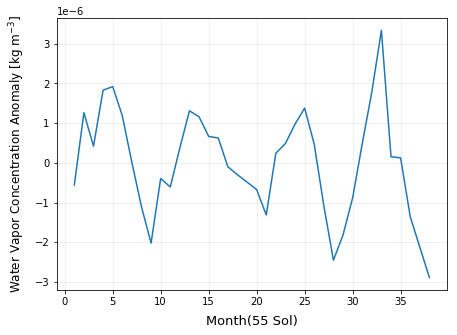

In [652]:
nn_wv_y = [-5.60617593e-07,  1.26053973e-06,  4.18314732e-07,  1.82800152e-06,
         1.91834554e-06,  1.18588979e-06,  7.69180865e-09, -1.10707743e-06,
        -2.02230285e-06, -3.94996381e-07, -6.09550382e-07,  3.78583548e-07,
        1.30854144e-06,  1.15873650e-06,  6.63396057e-07,  6.24857031e-07,
        -1.00042383e-07, -3.00723299e-07, -4.85452678e-07, -6.74837349e-07,
        -1.31268384e-06,  2.41157252e-07,  4.86117756e-07,  9.74947265e-07,
        1.37669203e-06,  4.67981154e-07, -1.08171079e-06, -2.45285856e-06,
        -1.81830316e-06, -8.85166490e-07,  4.77760869e-07,  1.78191478e-06,
         3.33498668e-06,  1.53839129e-07,  1.23432627e-07, -1.35353081e-06,
        -2.12461587e-06, -2.88725739e-06]

fig, axs = plt.subplots(1, 1, figsize= (7,5))

fig.subplots_adjust(hspace=0)
axs.plot(month_x, nn_wv_y)

axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

#axs.set_yscale('log')

plt.xlabel('Month(55 Sol)', labelpad = 8, fontsize = 13)
plt.ylabel('Water Vapor Concentration Anomaly [kg m$^{-3}$]', labelpad = 8, fontsize = 12)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.show()

In [514]:
# monthly average
temp_monthly_ave_conc = [np.mean(e) for e in temp_monthly_ranged_y]
monthly_temp = [e for e in temp_monthly_ave_conc if e >= 0]
month_x = [e + 1 for e in range(len(monthly_temp))]
months = [e for e in month_x if e%12 == 0]
months.insert(0, 0)
temp_ranged_by_month = [[e[1] for e in zip(month_x, monthly_temp) if month < e[0] <= month + 12
                    ] for month in months]
temp_ranged_with_month = [e for e in temp_ranged_by_month if len(e) == 12]
temp_month_ave = list(np.mean(temp_ranged_with_month, axis = 0))
temp_jan_ave = np.mean([temp_ranged_by_month[0][0], temp_ranged_by_month[1][0], temp_ranged_by_month[2][0],
                      temp_ranged_by_month[3][0]], axis = 0)
temp_feb_ave = np.mean([temp_ranged_by_month[0][1], temp_ranged_by_month[1][1], temp_ranged_by_month[2][1],
                      temp_ranged_by_month[3][1]], axis = 0)
temp_month_ave[0] = temp_jan_ave
temp_month_ave[1] = temp_feb_ave
temp_y_1 = temp_ranged_by_month[0]
temp_y_2 = temp_ranged_by_month[1]
temp_y_3 = temp_ranged_by_month[2]
temp_y_4 = temp_ranged_by_month[3]
temp_y_1_sub = np.subtract(temp_y_1, temp_month_ave)
temp_y_2_sub = np.subtract(temp_y_2, temp_month_ave)
temp_y_3_sub = np.subtract(temp_y_3, temp_month_ave)
temp_y_4_sub = np.subtract(temp_y_4, [temp_month_ave[0], temp_month_ave[1]])
temp_y = [temp_y_1_sub, temp_y_2_sub, temp_y_3_sub, temp_y_4_sub]
temp_y

[array([-1.89565586,  3.92208711,  2.41717831,  5.08135899,  5.81458044,
         3.74624371, -0.39779045, -4.90201172, -6.99435694, -5.23953795,
        -2.35410895,  0.03619642]),
 array([ 3.64018267,  2.52444763,  0.25089804,  1.80013108,  1.10126375,
        -0.41345236, -2.40692413, -4.14225857, -3.80498117, -0.62116986,
         1.27804116,  2.44650169]),
 array([ 2.33494695,  1.27767805, -2.66807635, -6.88149007, -6.91584419,
        -3.33279134,  2.80471458,  9.04427029, 10.79933811,  5.86070781,
         1.07606779, -2.48269811]),
 array([-4.07947377, -7.72421279])]

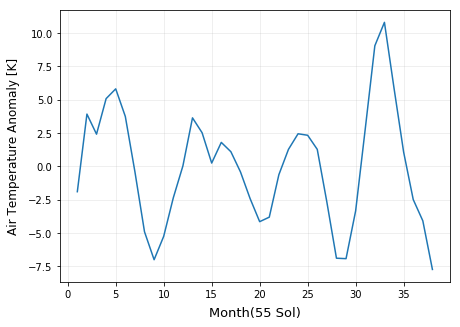

In [516]:
nn_temp_y = [-1.89565586,  3.92208711,  2.41717831,  5.08135899,  5.81458044,
         3.74624371, -0.39779045, -4.90201172, -6.99435694, -5.23953795,
        -2.35410895,  0.03619642,
        3.64018267,  2.52444763,  0.25089804,  1.80013108,  1.10126375,
        -0.41345236, -2.40692413, -4.14225857, -3.80498117, -0.62116986,
         1.27804116,  2.44650169,
        2.33494695,  1.27767805, -2.66807635, -6.88149007, -6.91584419,
        -3.33279134,  2.80471458,  9.04427029, 10.79933811,  5.86070781,
         1.07606779, -2.48269811,
        -4.07947377, -7.72421279]

fig, axs = plt.subplots(1, 1, figsize= (7,5))

fig.subplots_adjust(hspace=0)
axs.plot(month_x, nn_temp_y)

axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

#axs.set_yscale('log')

plt.xlabel('Month(55 Sol)', labelpad = 8, fontsize = 13)
plt.ylabel('Air Temperature Anomaly [K]', labelpad = 8, fontsize = 12)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.show()

### plot the daily/monthly/seasonal/annual mean for temp

In [156]:
# this is the ranged conc
ranged_air_temp = [[e[1] for e in zip(int_time, air_temp) if e[0] == day] for day in day_total]

# access the x and y that do not contain any missing values for the hours
temp_full_day_y = [ranged_air_temp[i] for i in full_day_index]

# get the average of them
temp_ave_daily_full_day = [np.mean(e) for e in temp_full_day_y]

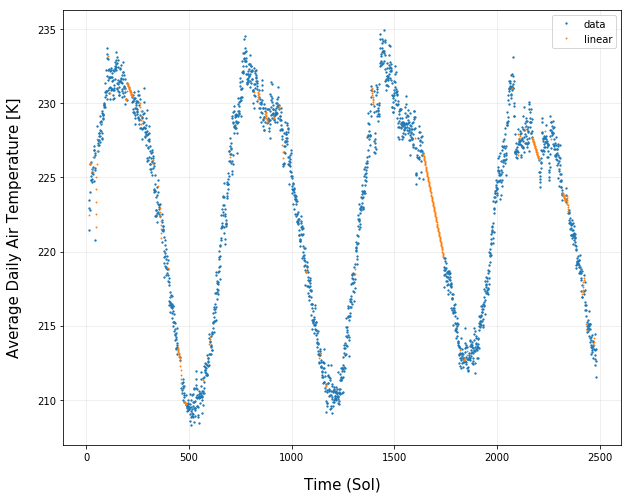

In [517]:
temp_ave_daily_full_day[1456] = float('nan')
temp_ave_daily_full_day[0]= float('nan')

temp_f = interp1d(full_day_x, temp_ave_daily_full_day)

fig, axs = plt.subplots(1, 1, figsize= (10,8))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)
plt.plot(full_day_x, temp_ave_daily_full_day, 'o', x_new, temp_f(x_new), '*', ms = 1.3)
axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

plt.xlabel('Time (Sol)', labelpad = 15, fontsize = 15)
plt.ylabel('Average Daily Air Temperature [K]', labelpad = 15, fontsize = 15)
plt.legend(['data', 'linear'], loc='best')
plt.show()

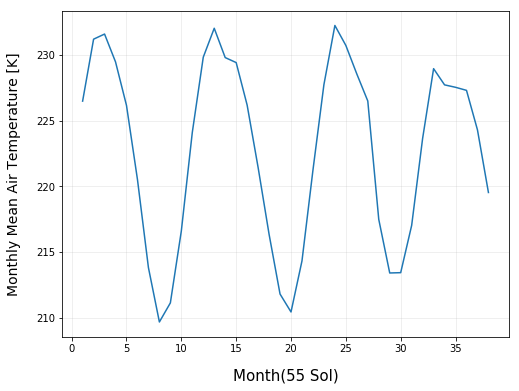

In [633]:
temp_ave_daily_full_day = [np.mean(e) for e in temp_full_day_y]
temp_f = interp1d(full_day_x, temp_ave_daily_full_day)
all_daily_temp = temp_f(full_day_x)


temp_monthly_total = [e for e in day_total if e%55 == 0]
temp_monthly_total.insert(0, 0)
tem_monthly_ranged_y = [[e[1] for e in zip(day_total, all_daily_temp) if month < e[0] <= month + 55
                    ] for month in temp_monthly_total]
temp_monthly_ranged_y = [e for e in tem_monthly_ranged_y if len(e) >= 55]
temp_monthly_x = [i + 1 for i in range(len(temp_monthly_ranged_y))]
#temp_monthly_x[-1] = float('nan')

temp_monthly_ave_conc = [np.mean(e) for e in temp_monthly_ranged_y]
#temp_monthly_ave_conc[-1] = float('nan')

fig, axs = plt.subplots(1, 1, figsize= (8,6))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)
axs.plot(temp_monthly_x, temp_monthly_ave_conc)
axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

plt.xlabel('Month(55 Sol)', labelpad = 15, fontsize = 15)
plt.ylabel('Monthly Mean Air Temperature [K]', labelpad = 15, fontsize = 14)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.show()

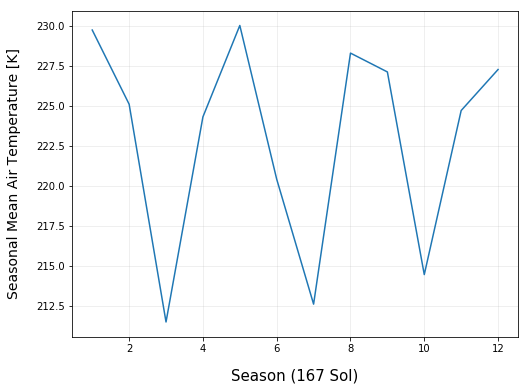

In [520]:
temp_f = interp1d(full_day_x, temp_ave_daily_full_day)
temp_ave_daily_full_day = [np.mean(e) for e in temp_full_day_y]
all_daily_temp = temp_f(full_day_x)

temp_seasonal_total = [e for e in day_total if e%167 == 0]

temp_seasonal_total.insert(0, 0)
tem_seasonal_ranged_y = [[e[1] for e in zip(day_total, all_daily_temp) if season < e[0] <= season + 167
                    ] for season in temp_seasonal_total]
temp_seasonal_ranged_y = [e for e in tem_seasonal_ranged_y if len(e) == 167]
temp_seasonal_x = [i + 1 for i in range(len(temp_seasonal_ranged_y))]

temp_seasonal_ave_conc = [np.mean(e) for e in temp_seasonal_ranged_y]

fig, axs = plt.subplots(1, 1, figsize= (8,6))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)
axs.plot(temp_seasonal_x, temp_seasonal_ave_conc)

#axs.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4])
#axs.set_yticklabels(['0','', '0.02', '', '0.04', '', '0.06', '', '0.08', '', '0.10', '', '0.12', '','0.14'], fontsize = 13)
axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

#axs.set_yscale('log')

plt.xlabel('Season (167 Sol)', labelpad = 15, fontsize = 15)
plt.ylabel('Seasonal Mean Air Temperature [K]', labelpad = 15, fontsize = 14)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.show()

In [331]:
len(tem_annual_ranged_y)

4

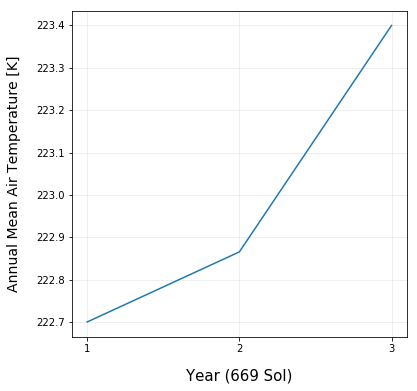

In [521]:
temp_annual_total = [e for e in day_total if e%669 == 0]
temp_annual_total.insert(0, 0)
tem_annual_ranged_y = [[e[1] for e in zip(day_total, all_daily_temp) if year < e[0] <= year + 669
                    ] for year in temp_annual_total]
temp_annual_ranged_y = [e for e in tem_annual_ranged_y if len(e) >= 669]
temp_annual_x = [i + 1 for i in range(len(temp_annual_ranged_y))]

temp_annual_ave_conc = [np.mean(e) for e in temp_annual_ranged_y]


fig, axs = plt.subplots(1, 1, figsize= (6,6))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)
axs.plot(temp_annual_x, temp_annual_ave_conc)
axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

plt.xlabel('Year (669 Sol)', labelpad = 15, fontsize = 15)
plt.ylabel('Annual Mean Air Temperature [K]', labelpad = 15, fontsize = 14)
axs.set_xticks([1,2,3])
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.show()

### plot the average daily wc with linear interpolation

In [638]:
len(day_total)

2482

In [646]:
# this is the ranged conc
ranged_y = [[e[1] for e in zip(int_time, water_conc_relative_hum_air_temp) if e[0] == day] for day in day_total]

# access the x and y that do not contain any missing values for the hours
full_day_index = [i for i in range(len(ranged_y)) if len(ranged_y[i]) >= 24]
not_full_day = [i for i in range(len(ranged_y)) if len(ranged_y[i]) < 24]
full_day_x = [day_total[i] for i in full_day_index]
full_day_y = [ranged_y[i] for i in full_day_index]

# get the average of them
ave_daily_full_da = [np.mean(e) for e in full_day_y]

# interpolated x
x_new = [e + 1 for e in not_full_day if full_day_x[0] < e < full_day_x[-1]]

In [623]:
n_arrr = [np.mean(full_day_y[i]) for i in full_day_index if 1482 <= i < 1486]
n_mea = np.mean(n_arrr)
ave_daily_full_day[1482] = n_mea

In [612]:
# search for index in the full day that contains the specific day
[i for i in range(len(full_day_x)) if full_day_x[i] == 10]

[0]

In [613]:
ave_daily_full_day[1456] = float('nan')
ave_daily_full_day[0]= float('nan')

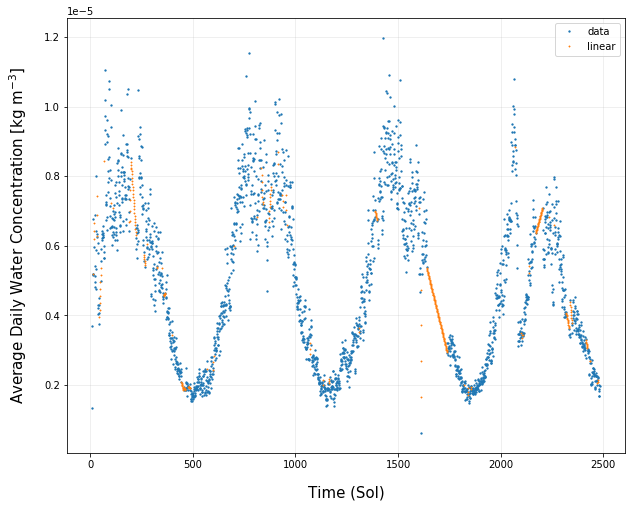

In [649]:
# interpolate
from scipy.interpolate import interp1d
f = interp1d(full_day_x, ave_daily_full_da)

fig, axs = plt.subplots(1, 1, figsize= (10,8))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)
plt.plot(full_day_x, ave_daily_full_day, 'o', x_new, f(x_new), '*', ms = 1.3)
#plt.plot(day_total,f(day_total), '*', ms = 1.3)
axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

#axs.set_xlim(1738, 1747)

plt.xlabel('Time (Sol)', labelpad = 15, fontsize = 15)
plt.ylabel('Average Daily Water Concentration [kg m$^{-3}$]', labelpad = 15, fontsize = 15)
plt.legend(['data', 'linear'], loc='best')
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.show()

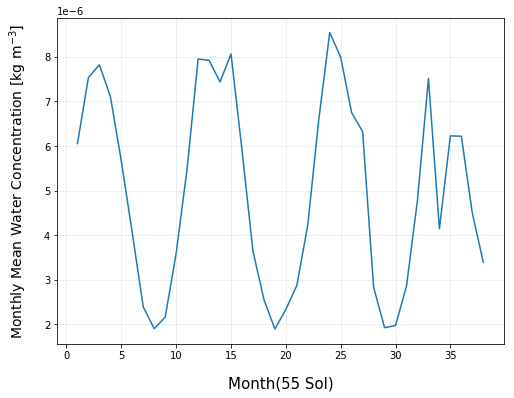

In [365]:
all_daily_ave = f(full_day_x)

n_monthly_total = [e for e in day_total if e%55 == 0]
n_monthly_total.insert(0, 0)
monthly_ranged_y = [[e[1] for e in zip(day_total, all_daily_ave) if month < e[0] <= month + 55 
                    ] for month in n_monthly_total]
n_monthly_ranged_y = [e for e in n_monthly_ranged_y if len(e) >= 55]
n_monthly_x = [i + 1 for i in range(len(n_monthly_ranged_y))]


n_monthly_ave_conc = [np.mean(e) for e in n_monthly_ranged_y]

fig, axs = plt.subplots(1, 1, figsize= (8,6))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)
axs.plot(n_monthly_x, n_monthly_ave_conc)
axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

plt.xlabel('Month(55 Sol)', labelpad = 15, fontsize = 15)
plt.ylabel('Monthly Mean Water Concentration [kg m$^{-3}$]', labelpad = 15, fontsize = 14)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.show()

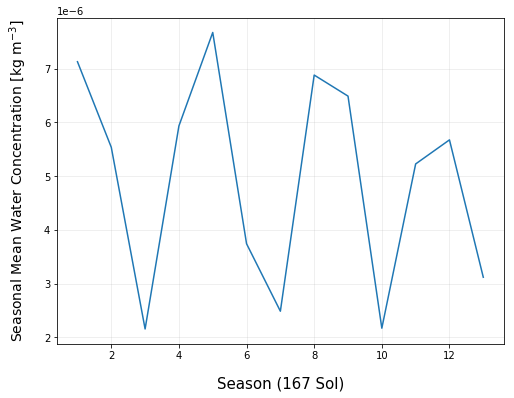

In [372]:
ave_daily_full_day = [np.mean(e) for e in full_day_y]
f = interp1d(full_day_x, ave_daily_full_day)
all_daily_ave = f(full_day_x)
seasonal_total = [e for e in day_total if e%167 == 0]

seasonal_total.insert(0, 0)
n_seasonal_ranged_y = [[e[1] for e in zip(day_total, all_daily_ave) if season < e[0] <= season + 167
                    ] for season in seasonal_total]
seansonal_ranged_y = [e for e in n_seasonal_ranged_y if len(e) == 167]
seasonal_ave_conc = [np.mean(e) for e in seasonal_ranged_y]

seasonal_x = [i + 1 for i in range(len(seasonal_ranged_y))]

fig, axs = plt.subplots(1, 1, figsize= (8,6))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)
axs.plot(seasonal_x, seasonal_ave_conc)

#axs.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4])
#axs.set_yticklabels(['0','', '0.02', '', '0.04', '', '0.06', '', '0.08', '', '0.10', '', '0.12', '','0.14'], fontsize = 13)
axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

#axs.set_yscale('log')

plt.xlabel('Season (167 Sol)', labelpad = 15, fontsize = 15)
plt.ylabel('Seasonal Mean Water Concentration [kg m$^{-3}$]', labelpad = 15, fontsize = 14)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.show()

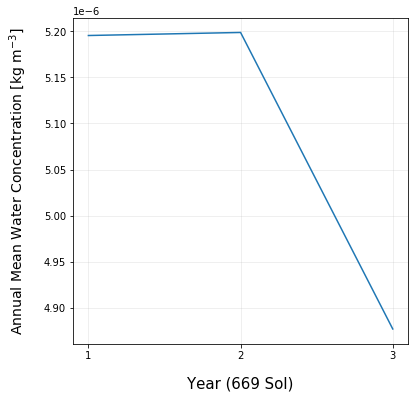

In [370]:
ave_daily_full_day = [np.mean(e) for e in full_day_y]
temp_f = interp1d(full_day_x, ave_daily_full_day)
all_daily_ave = f(full_day_x)
annual_total = [e for e in day_total if e%669 == 0]
annual_total.insert(0, 0)
n_annual_ranged_y = [[e[1] for e in zip(day_total, all_daily_ave) if year < e[0] <= year + 669
                    ] for year in annual_total]
annual_ranged_y = [e for e in n_annual_ranged_y if len(e)>=669]
annual_ave_conc = [np.mean(e) for e in annual_ranged_y]
annual_x = [i + 1 for i in range(len(annual_ranged_y))]

fig, axs = plt.subplots(1, 1, figsize= (6,6))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)
axs.plot(annual_x, annual_ave_conc)
axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

plt.xlabel('Year (669 Sol)', labelpad = 15, fontsize = 15)
plt.ylabel('Annual Mean Water Concentration [kg m$^{-3}$]', labelpad = 15, fontsize = 14)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axs.set_xticks([1,2,3])
plt.show()

In [281]:
# access the sol rounded to 2 dec places
rounded_sol_5_dec = [truncate_float(e, 5) for e in x_time]

In [282]:
# created an array w/o missing hour
hour_total = []
plus_max_day = max_day + 1
i = 1
while i < plus_max_day:
    i += 0.04167
    hour_total.append(i)
hour_total_n = [truncate_float(e, 5) for e in hour_total if e < 2483]

In [ ]:
# initialize list of lists 
daily_average = list(zip(x_new, PlotY_32))
  
# Create the pandas DataFrame 
df_32_n = pd.DataFrame(data_32_n, columns = ['Ls', 'LOSOD']) 
  
# print dataframe. 

export_csv = df_32_n.to_csv('~/Desktop/polynomial_MY_32_values.csv', index = None, header=True)

In [283]:
hourly_ranged_y = [[[e[1] for e in zip(rounded_sol_5_dec, water_conc_relative_hum_air_temp) 
                    if hour-0.001 < e[0] <= hour+0.001] for hour in hour_total_n if int(hour) == day] for day in day_total]

In [138]:
daily_ave_conc = [np.mean(e) for e in ranged_y]

In [209]:
# access the missing day
import math
missing_index = [i for i in range(len(daily_ave_conc)) if math.isnan(daily_ave_conc[i]) is True]
missing_day = [e + 1 for e in missing_index]

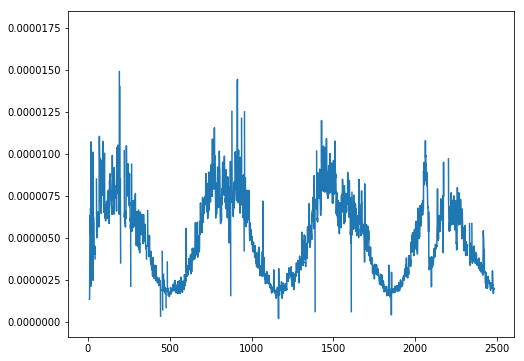

In [139]:
# plot average (before filling the gap)
fig, axs = plt.subplots(1, 1, figsize= (8,6))
fig.subplots_adjust(hspace=0)

axs.plot(day_total, daily_ave_conc)
#axs.set_xlim(1, 669)

In [145]:
daily_ave_conc = [np.mean(e) for e in ranged_y]
monthly_total = [e for e in day_total if e%30 == 0]
monthly_total.insert(0, 0)
monthly_total = [e for e in day_total if e%30 == 0]
monthly_total.insert(0, 0)
monthly_ranged_y = [[e[1] for e in zip(day_total, daily_ave_conc) if month < e[0] <= month + 30 and e[1] >= 0
                    ] for month in monthly_total]
monthly_ave_conc = [np.mean(e) for e in monthly_ranged_y]

In [523]:
monthly_total = [e for e in day_total if e%30 == 0]
monthly_total.insert(0, 0)
monthly_ranged_y = [[e[1] for e in zip(day_total, daily_ave_conc) if month < e[0] <= month + 30 and e[1] >= 0
                    ] for month in monthly_total]

NameError: name 'daily_ave_conc' is not defined

In [204]:
monthly_ave_conc = [np.mean(e) for e in monthly_ranged_y]